# Pujol et al. 2018 bias Prototype

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np

In [3]:
import galsim
import autometacal as amc
import tensorflow as tf
import ngmix
import galsim
rng = random.RandomState(314)

In [4]:
rng.normal

<function RandomState.normal>

In [48]:
#set image properties:
stamp_size = 51
pixel_scale = 0.2
psf_fwhm = .7
psf_shape = [0.01,0.02]

noise_level = 1
noise_psf = 1e-5

## Fixed Objects

In [ ]:
cat = galsim.COSMOSCatalog(sample="23.5")

## Generate Galaxies from COSMOS parametric catalog

In [7]:
def make_galaxy(cat,i):
  """Generate galaxy out of COSMOS catalog"""
  gal = cat.makeGalaxy(i, gal_type='parametric')
  gal_mag = cat.param_cat['mag_auto'][cat.orig_index[i]]
  return gal, gal_mag

In [43]:
gal,mag=make_galaxy(cat,1232)
try:
  imshow(gal.drawImage(nx=51,ny=51,scale=.2).array);colorbar()
except:
  pass

In [44]:
noise_image = rng.normal(0,noise_level,size=[stamp_size,stamp_size])
psf_noise_image = rng.normal(0,noise_psf,size=[stamp_size,stamp_size])

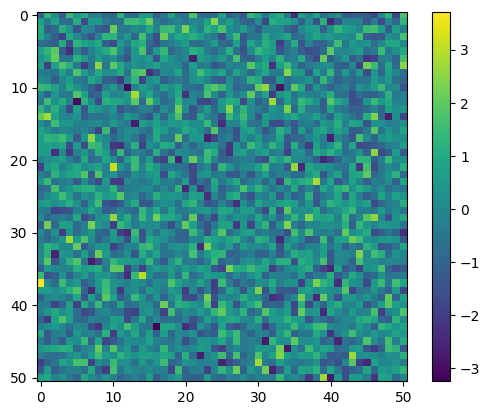

In [45]:
imshow(noise_image);colorbar()

In [49]:
def observe(gal,psf,stamp_size=51,scale=.2):
  """Make pixelised version of the galaxy image and psf model, with noise."""
  
  
  psf_img = psf.drawImage(nx=stamp_size,ny=stamp_size,scale=scale,method='auto')
  obs_img = galsim.Convolve([gal,psf])
  return obs_img.array + noise_image,psf_img.array + psf_noise_image

In [50]:
obs_img,psf_img = observe(gal,psf)

AttributeError: 'Convolution' object has no attribute 'array'

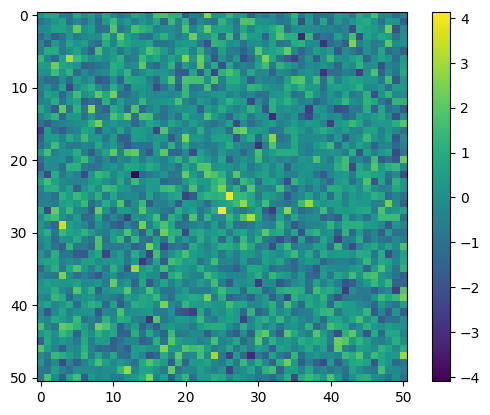

In [20]:
imshow(obs_img);colorbar()

## Measure galaxy ellipticities with metacalibration

In [ ]:
def make_ngmix_obs(gal_img,psf_img,gal_jac,psf_jac, gal_weights, psf_weights):
  """Create an ngmix observation from numpy arrays representing the observed galaxy image
  and the psf model
  """
  psf_obs = ngmix.Observation(
    psf_img,
    weight=psf_weights,
    jacobian = psf_jac
  )

  obs = ngmix.Observation(
    obs_array,
    weight=gal_weights,
    psf=psf_obs,
    jacobian = gal_jac
  )
  return obs
  
gal_jac = ngmix.DiagonalJacobian(row=25.,col=25.,scale=pixel_scale)  
psf_jac = ngmix.DiagonalJacobian(row=25.,col=25.,scale=pixel_scale)
gal_weights = np.ones([stamp_size,stamp_size])/noise_level**2 
psf_weights = np.ones([stamp_size,stamp_size])/noise_psf**2

## Implement Pujol test

In [ ]:
def get_all_pujol(gal,psf):
  """Generate sheared versions of a galsim object and convolve with a galsim object for the psf"""
  step = 0.01
  gal_1p = gal.shear(g1=step,g2=0)
  gal_2p = gal.shear(g1=0,g2=step)
  
  shape_noshear = galsim.Convolve([gal,psf])
  shape_1p = galsim.Convolve([gal_1p,psf])
  shape_2p = galsim.Convolve([gal_2p,psf])
  
  return shape_noshear, shape_1p, shape_2p
  
  